In [70]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [71]:
df=pd.read_csv('file:///F:/segmentation%20data.csv')
df.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [72]:
df=df.set_index('ID')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [74]:
df.describe()

Sex  Marital status          Age   Education         Income  \
count  2000.000000     2000.000000  2000.000000  2000.00000    2000.000000   
mean      0.457000        0.496500    35.909000     1.03800  120954.419000   
std       0.498272        0.500113    11.719402     0.59978   38108.824679   
min       0.000000        0.000000    18.000000     0.00000   35832.000000   
25%       0.000000        0.000000    27.000000     1.00000   97663.250000   
50%       0.000000        0.000000    33.000000     1.00000  115548.500000   
75%       1.000000        1.000000    42.000000     1.00000  138072.250000   
max       1.000000        1.000000    76.000000     3.00000  309364.000000   

        Occupation  Settlement size  
count  2000.000000      2000.000000  
mean      0.810500         0.739000  
std       0.638587         0.812533  
min       0.000000         0.000000  
25%       0.000000         0.000000  
50%       1.000000         1.000000  
75%       1.000000         1.000000  
max       2.000000         2.000000

In [75]:
df.corr().describe()

Sex  Marital status       Age  Education    Income  Occupation  \
count  7.000000        7.000000  7.000000   7.000000  7.000000    7.000000   
mean   0.132860        0.218184  0.261042   0.372311  0.353805    0.313298   
std    0.493344        0.445109  0.442060   0.345907  0.416656    0.439798   
min   -0.300803       -0.213178 -0.213178   0.034732 -0.195146   -0.202491   
25%   -0.198819       -0.085284 -0.037248   0.148991  0.079965    0.017517   
50%   -0.182885       -0.029490  0.119751   0.244838  0.340610    0.108388   
75%    0.405674        0.470264  0.497608   0.514311  0.585619    0.626076   
max    1.000000        1.000000  1.000000   1.000000  1.000000    1.000000   

       Settlement size  
count         7.000000  
mean          0.259902  
std           0.449169  
min          -0.300803  
25%          -0.031154  
50%           0.119751  
75%           0.531338  
max           1.000000

In [76]:
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [77]:
df.dtypes

Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

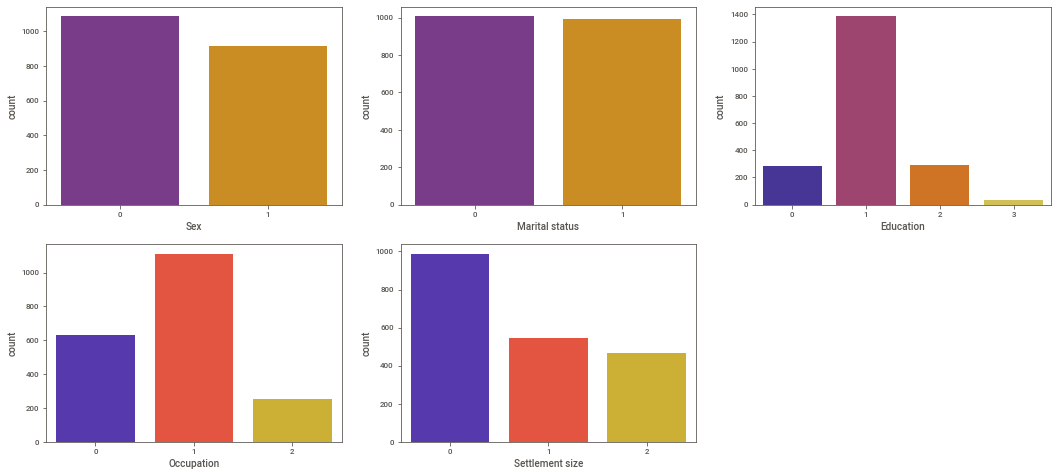

In [78]:
plt.figure(figsize=(18,8),num=1)
m=1
for i in df.drop(['Age','Income'],axis=1).columns:
    plt.subplot(2,3,m)
    sns.countplot(x=i,palette='CMRmap',data=df)
    m+=1

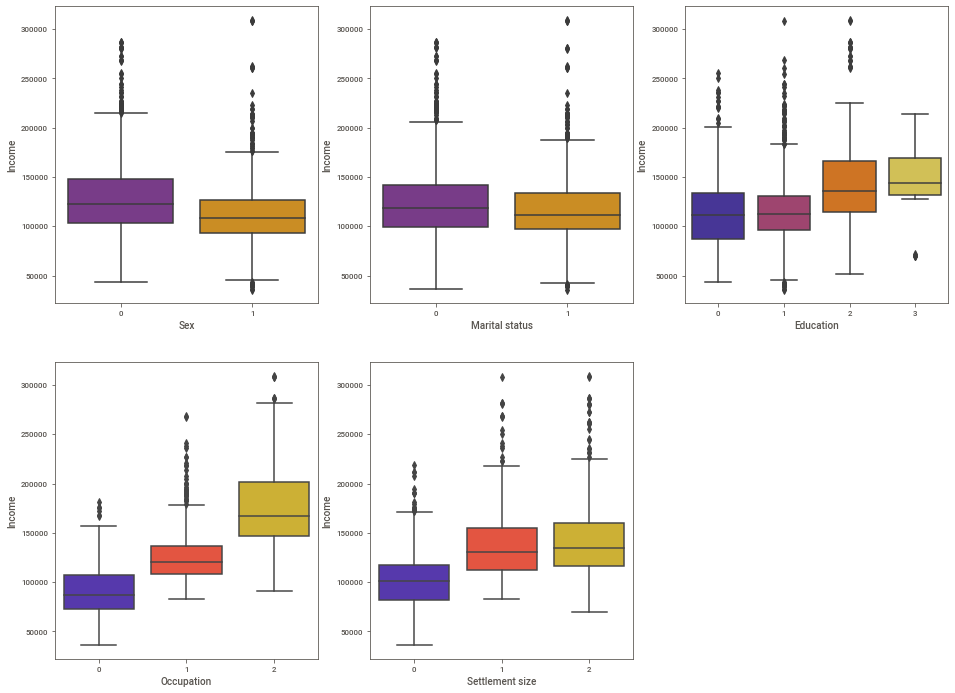

In [79]:
plt.figure(figsize=(16,12),num=1)
m=1
for i in df.drop(['Age','Income'],axis=1).columns:
    plt.subplot(2,3,m)
    sns.boxplot(x=i,y='Income',palette='CMRmap',data=df)
    m+=1

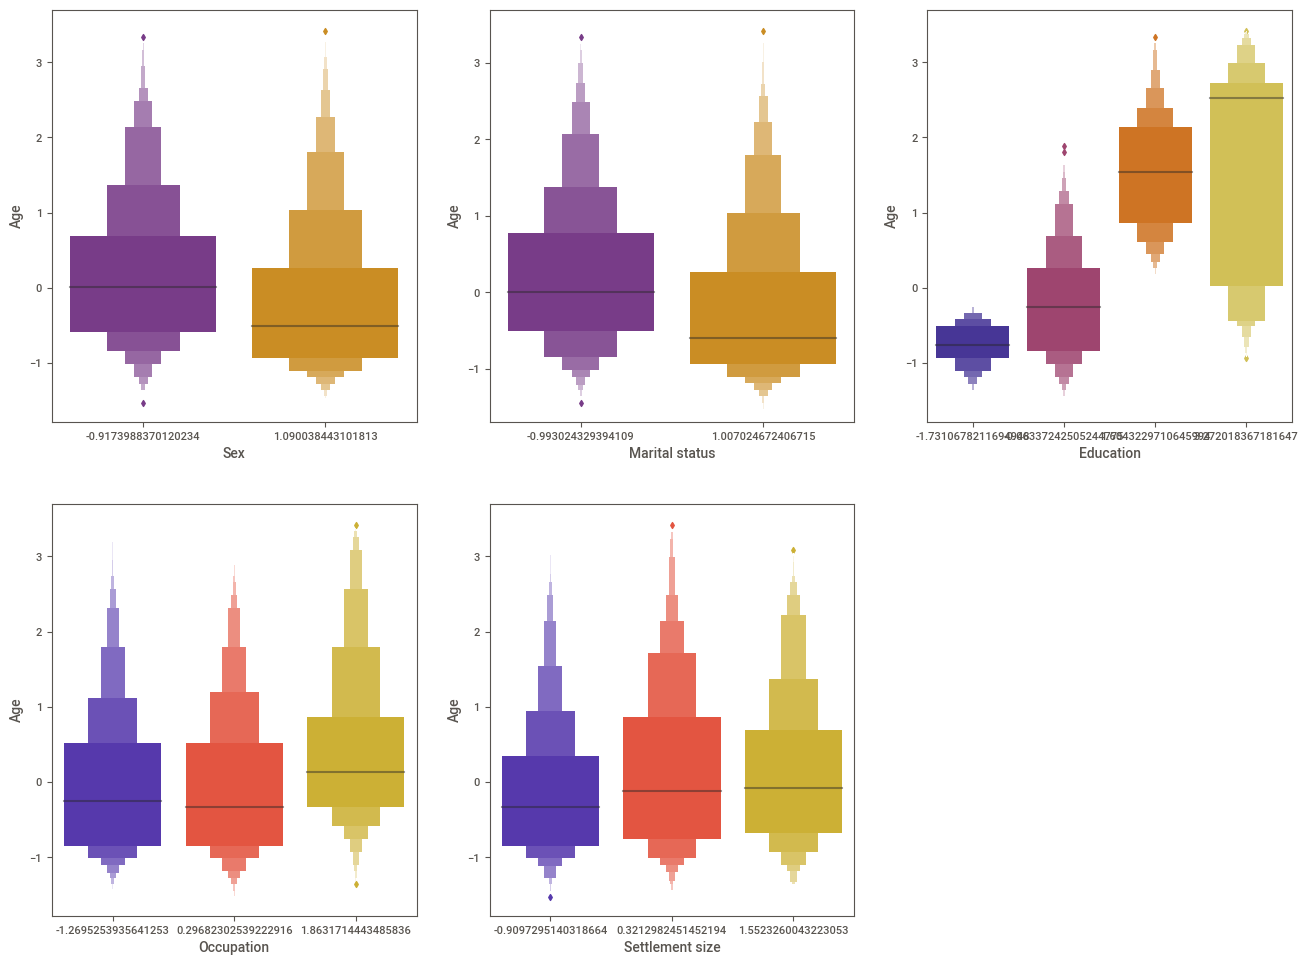

In [114]:
plt.figure(figsize=(16,12),num=1)
m=1
for i in df.drop(['Age','Income'],axis=1).columns:
    plt.subplot(2,3,m)
    sns.boxenplot(x=i,y='Age',palette='CMRmap',data=df)
    m+=1

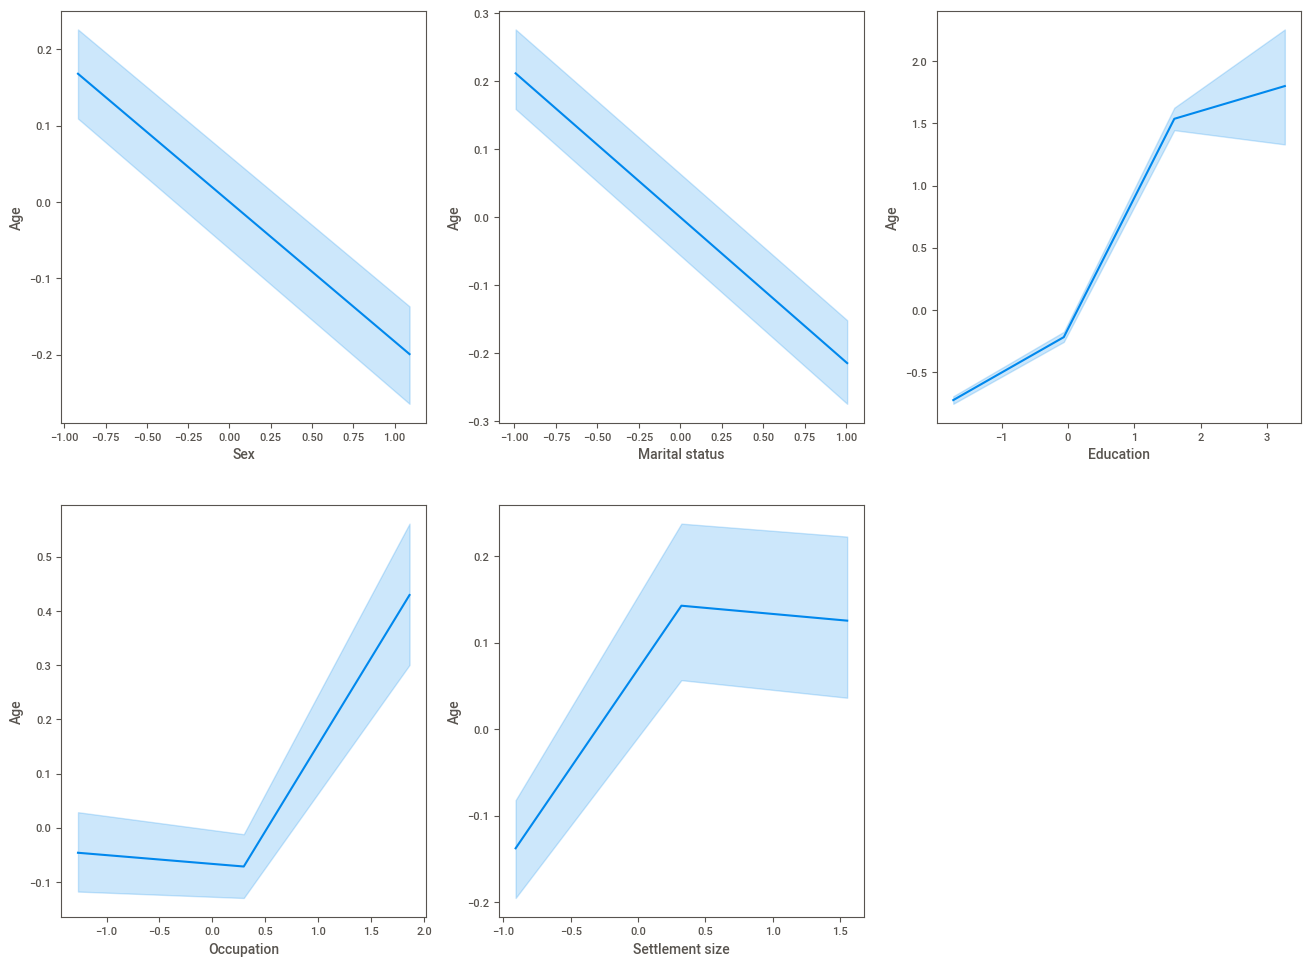

In [118]:
plt.figure(figsize=(16,12),num=1)
m=1
for i in df.drop(['Age','Income'],axis=1).columns:
    plt.subplot(2,3,m)
    sns.lineplot(x=i,y='Age',palette='CMRmap',data=df)
    m+=1

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


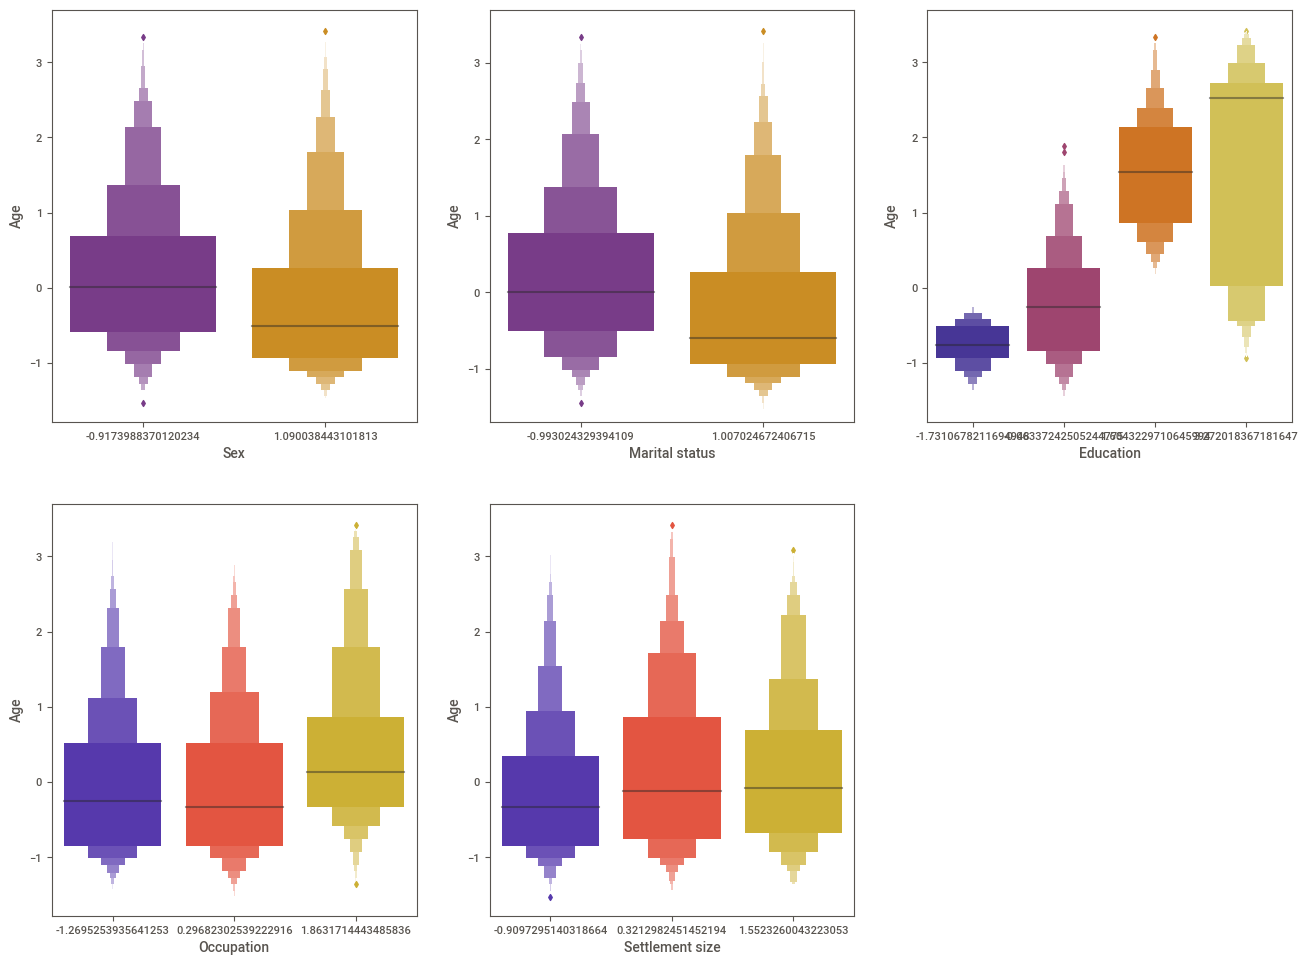

In [119]:
plt.figure(figsize=(16,12),num=1)
m=1
for i in df.drop(['Age','Income'],axis=1).columns:
    plt.subplot(2,3,m)
    sns.lvplot(x=i,y='Age',palette='CMRmap',data=df)
    m+=1

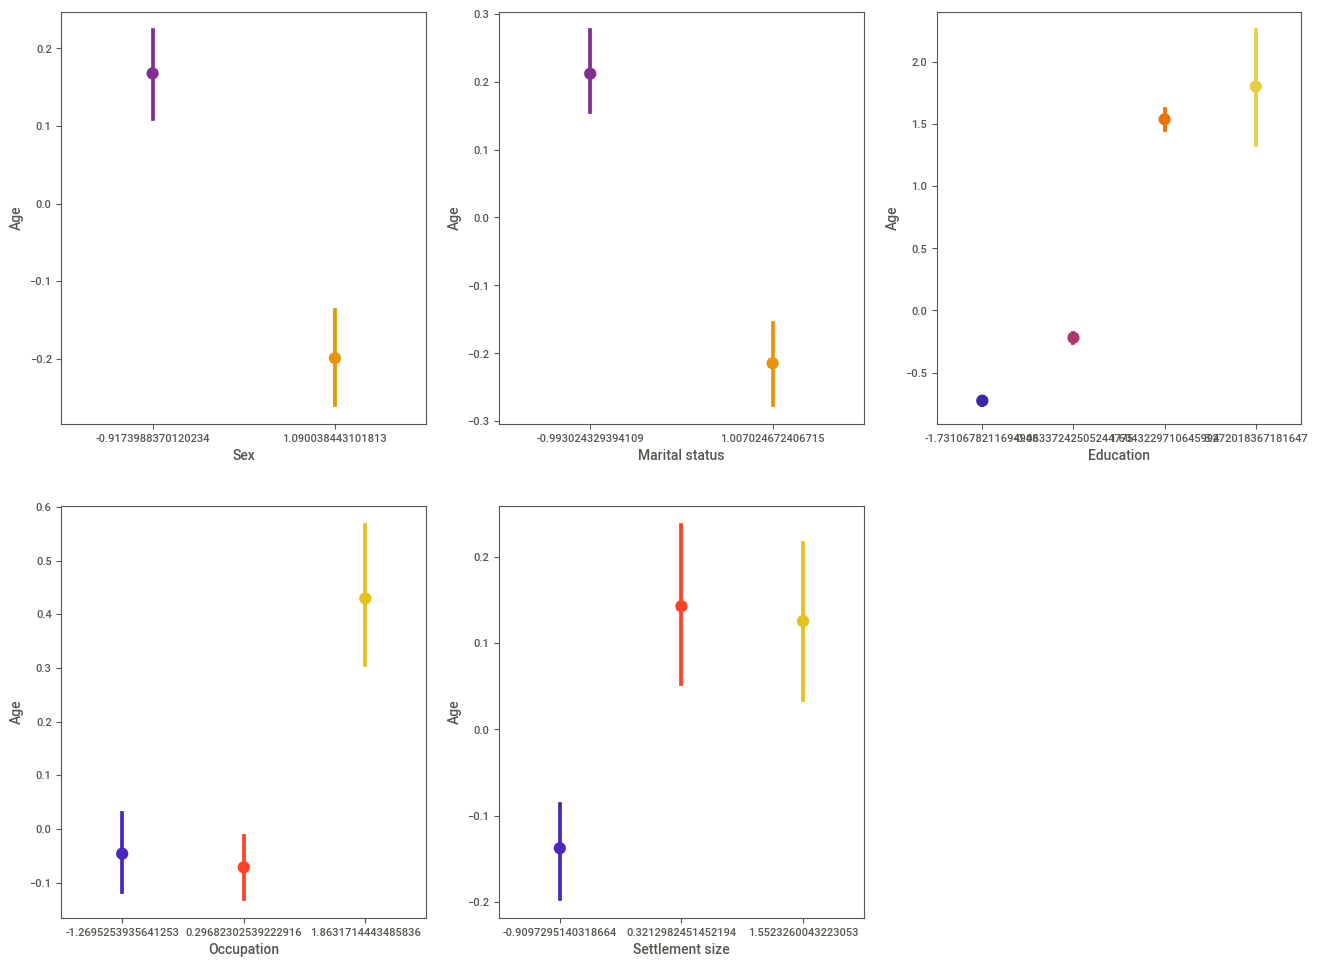

In [120]:
plt.figure(figsize=(16,12),num=1)
m=1
for i in df.drop(['Age','Income'],axis=1).columns:
    plt.subplot(2,3,m)
    sns.pointplot(x=i,y='Age',palette='CMRmap',data=df)
    m+=1

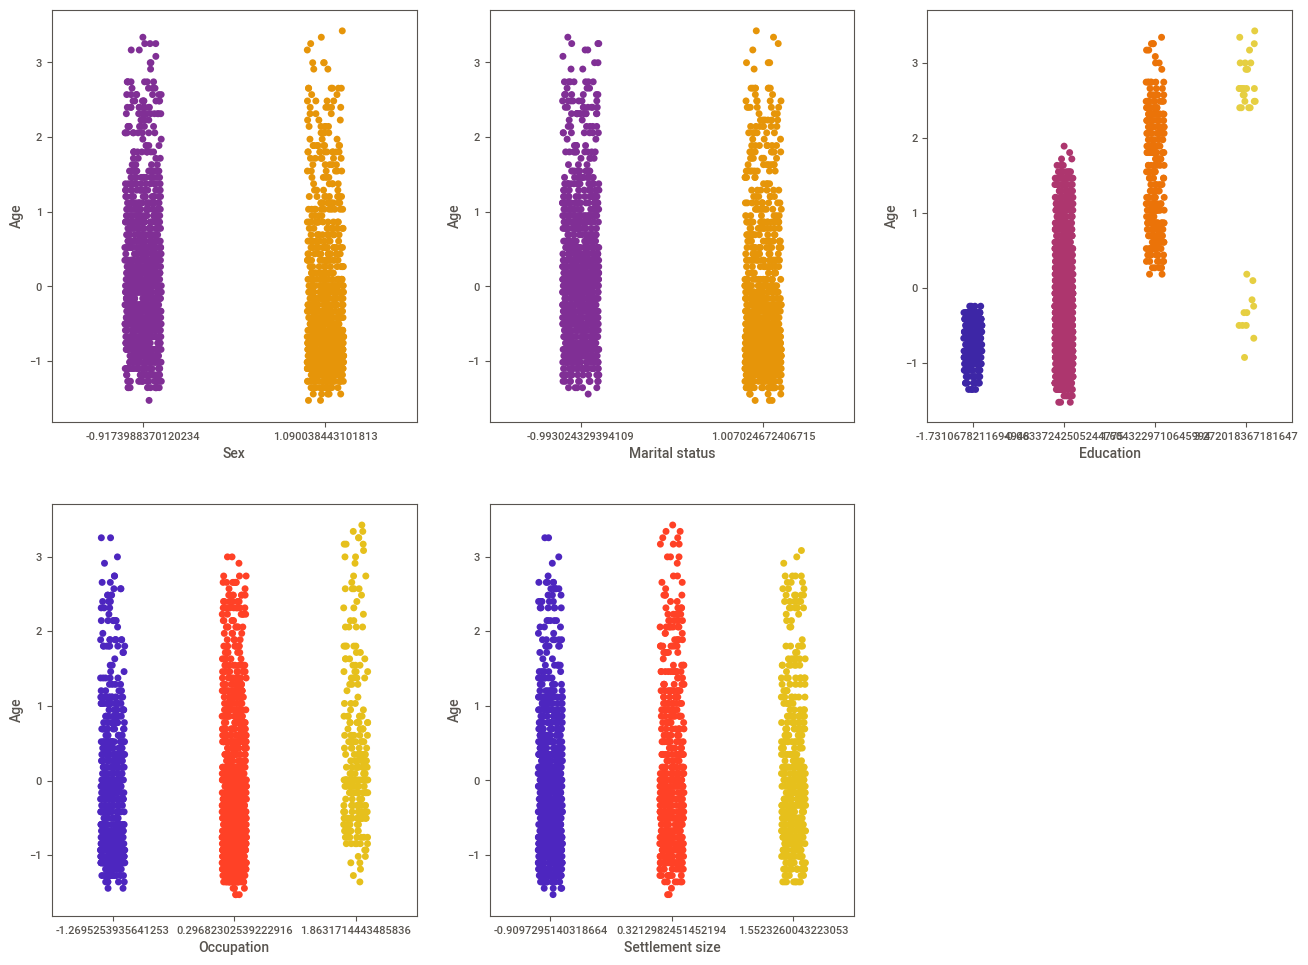

In [122]:
plt.figure(figsize=(16,12),num=1)
m=1
for i in df.drop(['Age','Income'],axis=1).columns:
    plt.subplot(2,3,m)
    sns.stripplot(x=i,y='Age',palette='CMRmap',data=df)
    m+=1

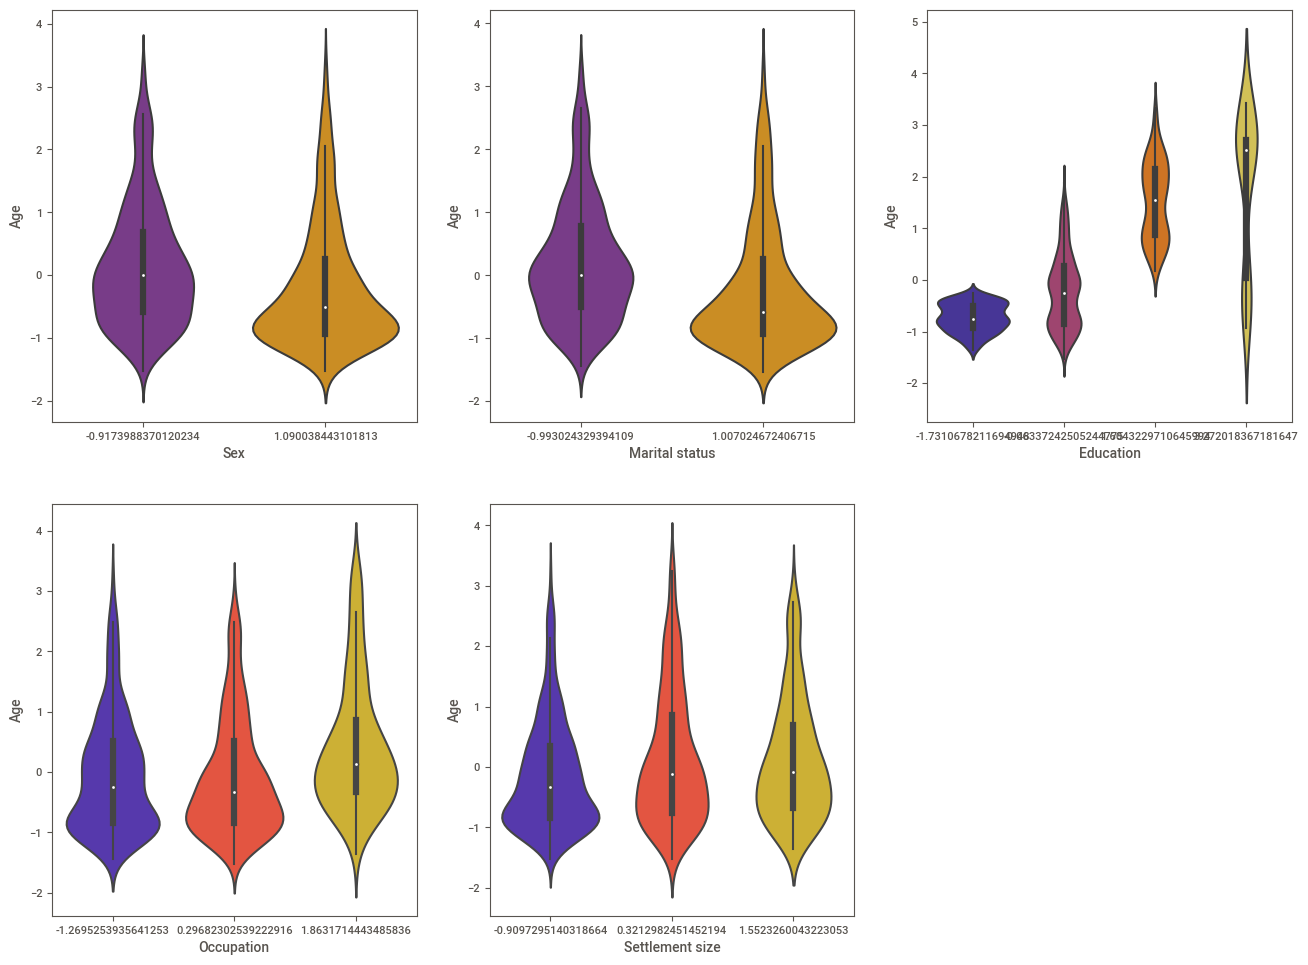

In [123]:
plt.figure(figsize=(16,12),num=1)
m=1
for i in df.drop(['Age','Income'],axis=1).columns:
    plt.subplot(2,3,m)
    sns.violinplot(x=i,y='Age',palette='CMRmap',data=df)
    m+=1

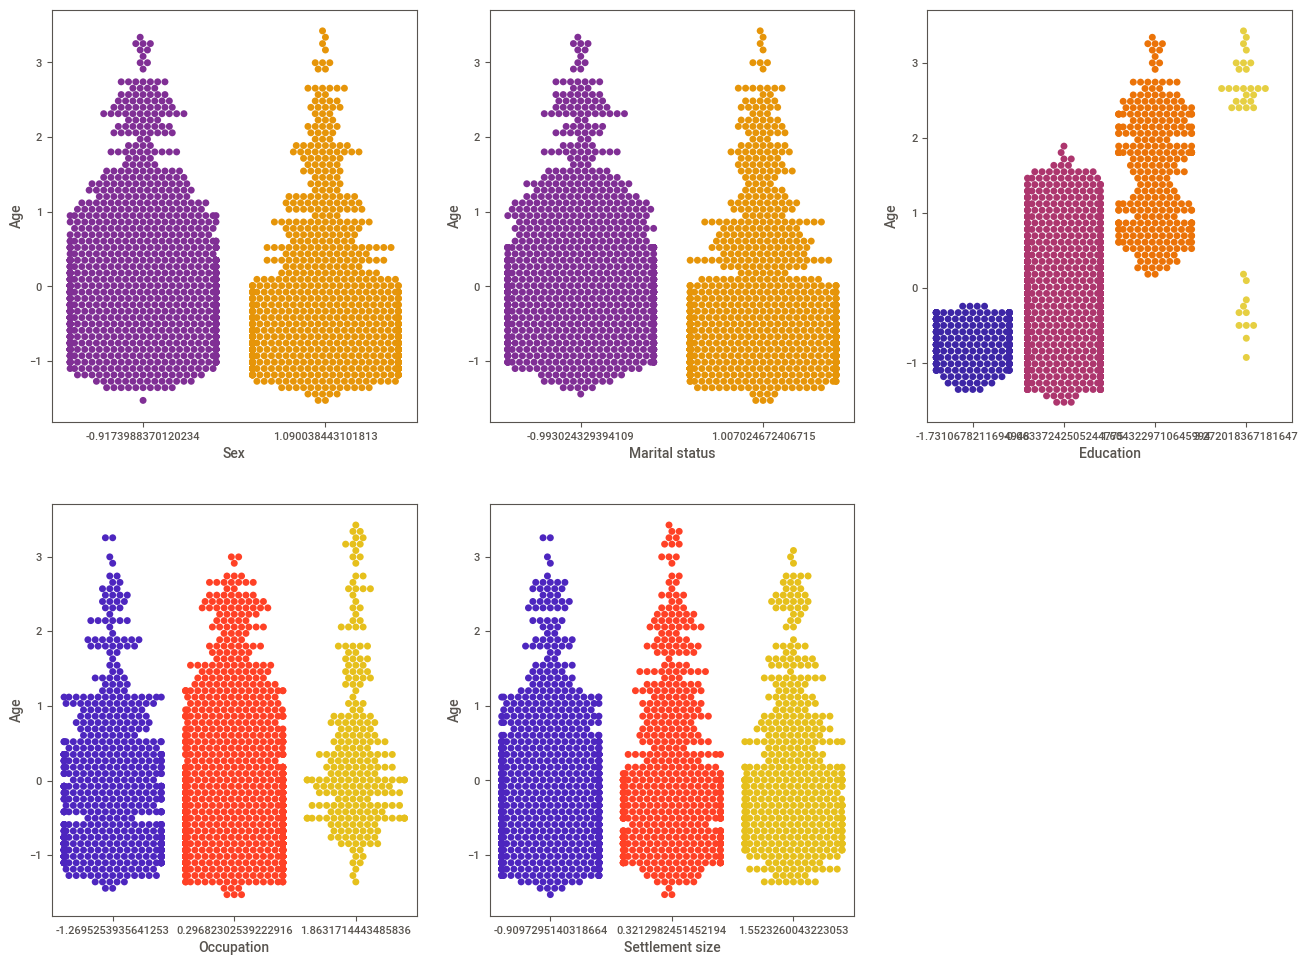

In [127]:
plt.figure(figsize=(16,12),num=1)
m=1
for i in df.drop(['Age','Income'],axis=1).columns:
    plt.subplot(2,3,m)
    sns.swarmplot(x=i,y='Age',palette='CMRmap',data=df)
    m+=1

In [81]:
df.head()

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1

In [82]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [83]:
x=df.Age.values
y=df.Income.values

In [84]:
x=x.reshape(-1,1)

In [85]:
y=y.reshape(-1,1)

In [86]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

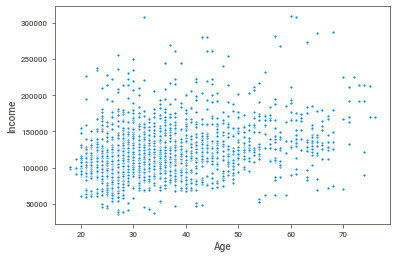

In [87]:
sns.scatterplot(x=df["Age"], y=df["Income"], 
data=df)

In [88]:
df.corr().abs()['Education'].sort_values(ascending = False)

Education          1.000000
Age                0.654605
Marital status     0.374017
Sex                0.244838
Income             0.233459
Occupation         0.064524
Settlement size    0.034732
Name: Education, dtype: float64

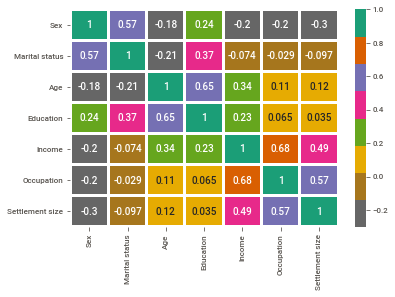

In [89]:
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

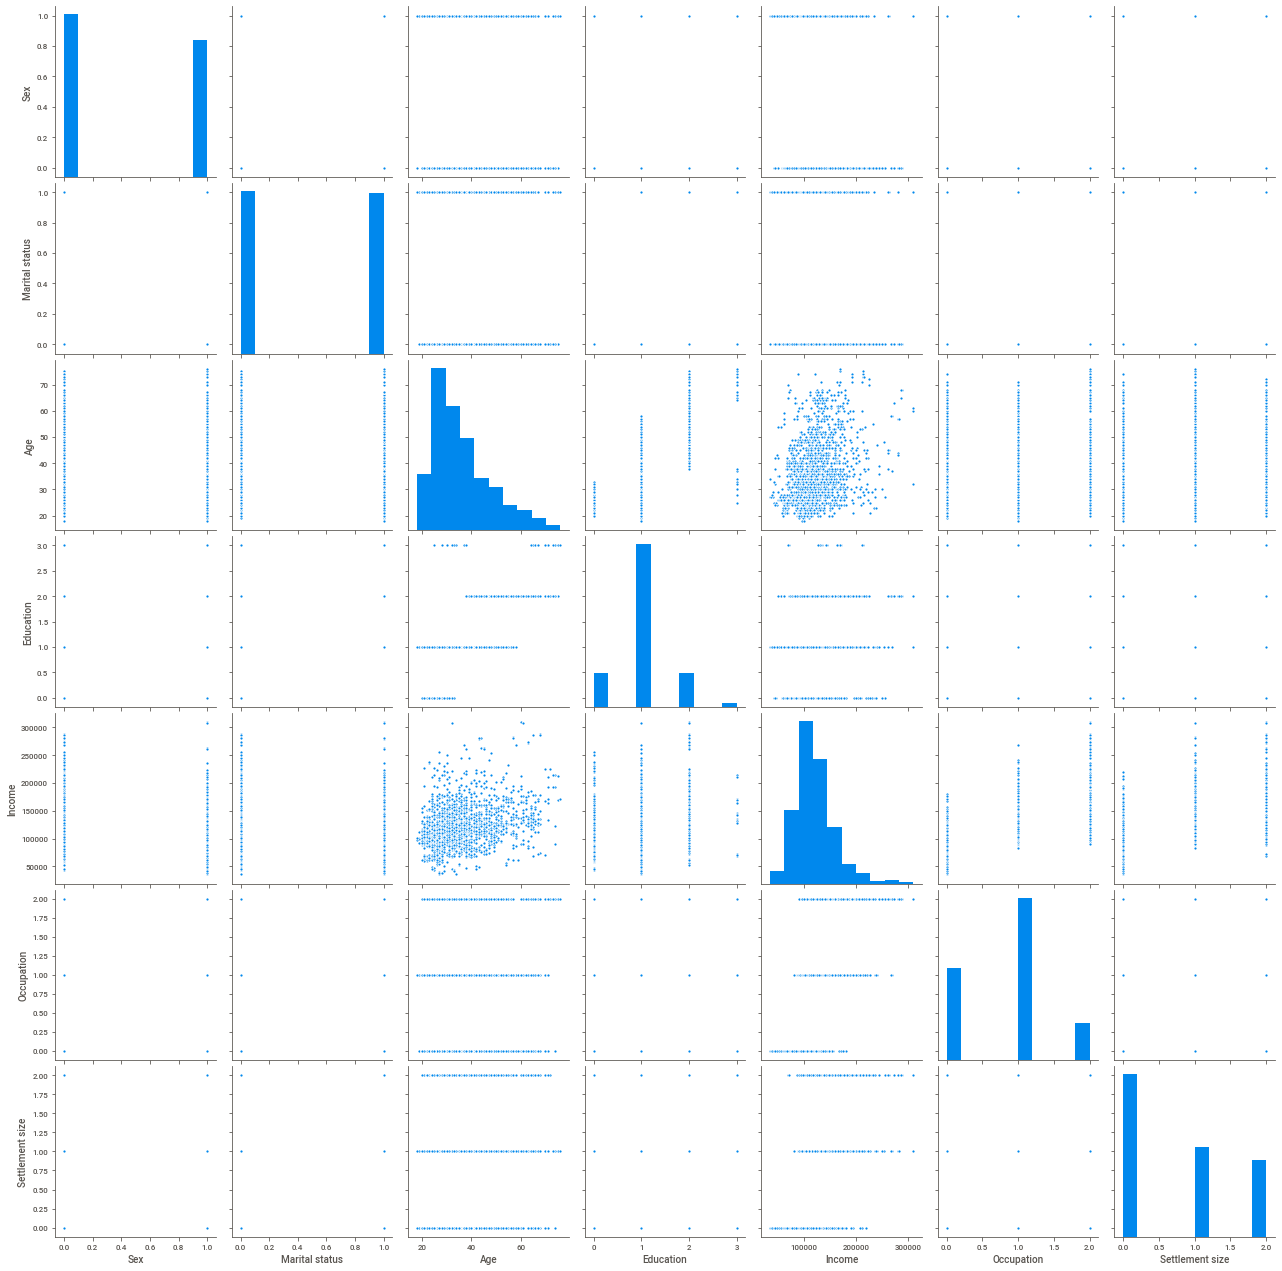

In [90]:
sns.pairplot(df)

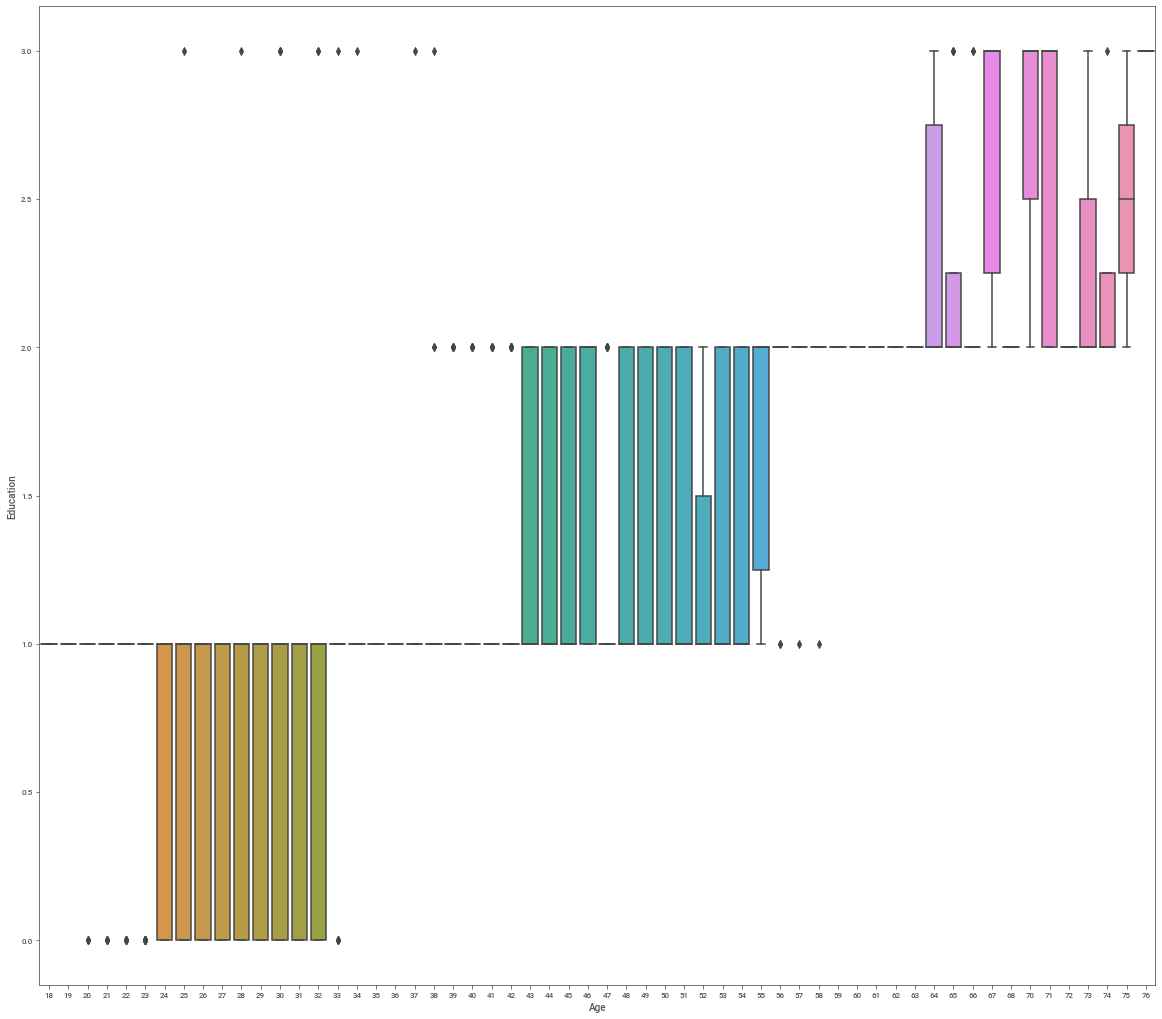

In [91]:
plt.figure(figsize=(20,18))
sns.boxplot(x=df["Age"], y=df["Education"], 
data=df)

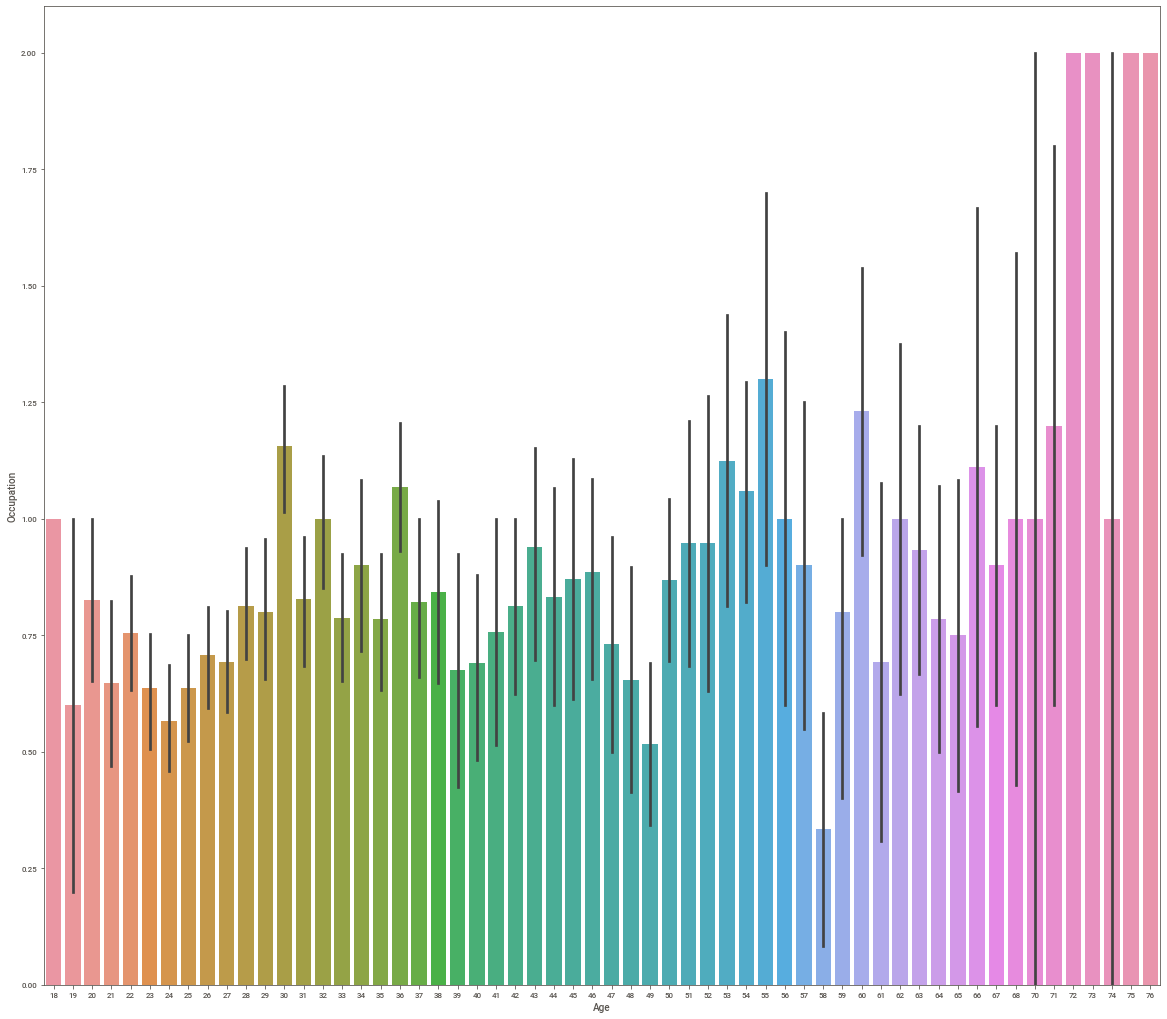

In [92]:
plt.figure(figsize=(20,18))
sns.barplot(x=df["Age"], y=df["Occupation"], 
data=df)

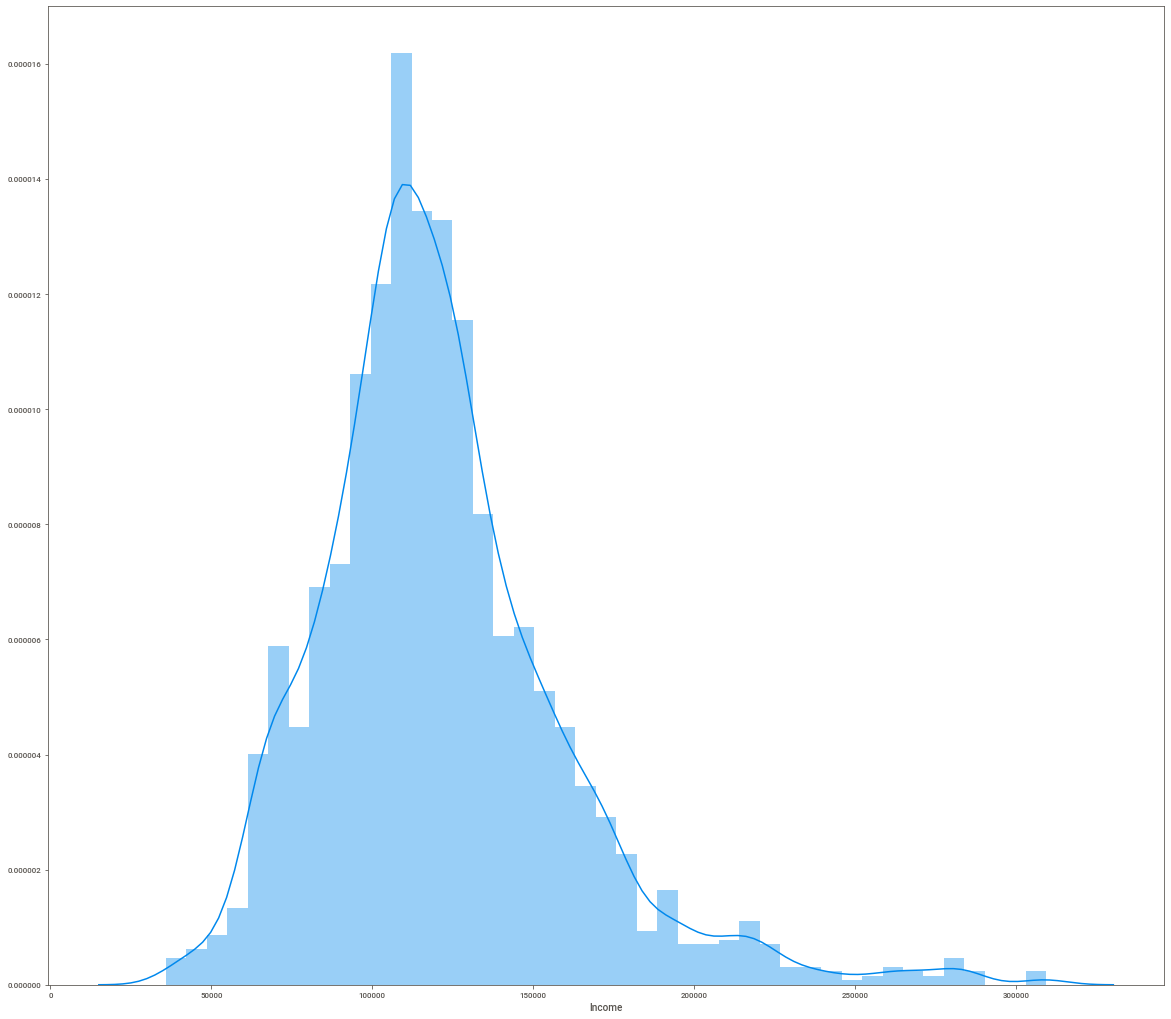

In [93]:
plt.figure(figsize=(20,18))
sns.distplot(df['Income'])

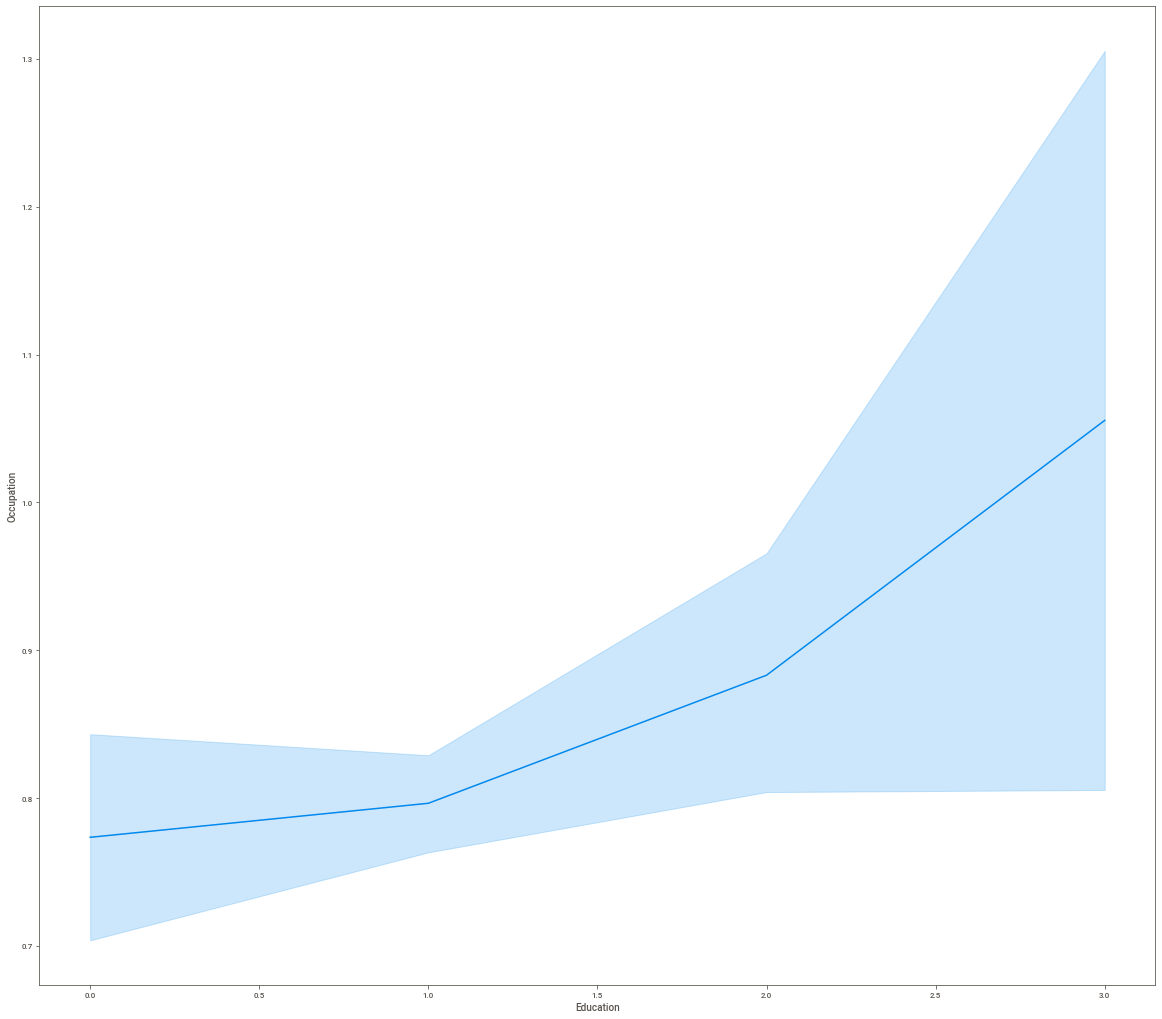

In [94]:
plt.figure(figsize=(20,18))
sns.lineplot(x=df["Education"], y=df["Occupation"], 
data=df)

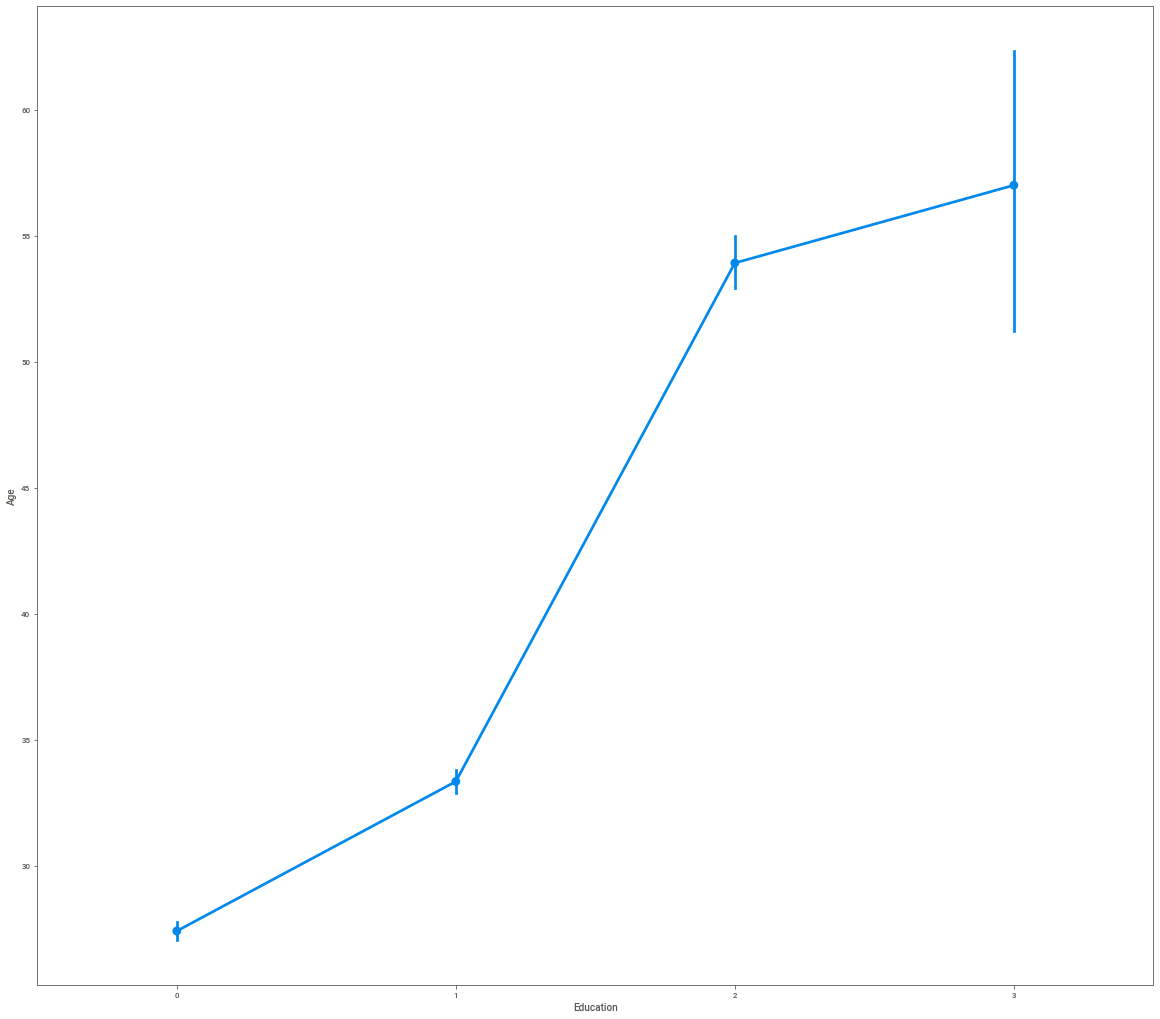

In [95]:
plt.figure(figsize=(20,18))
sns.pointplot(x=df["Education"], y=df["Age"], 
data=df)

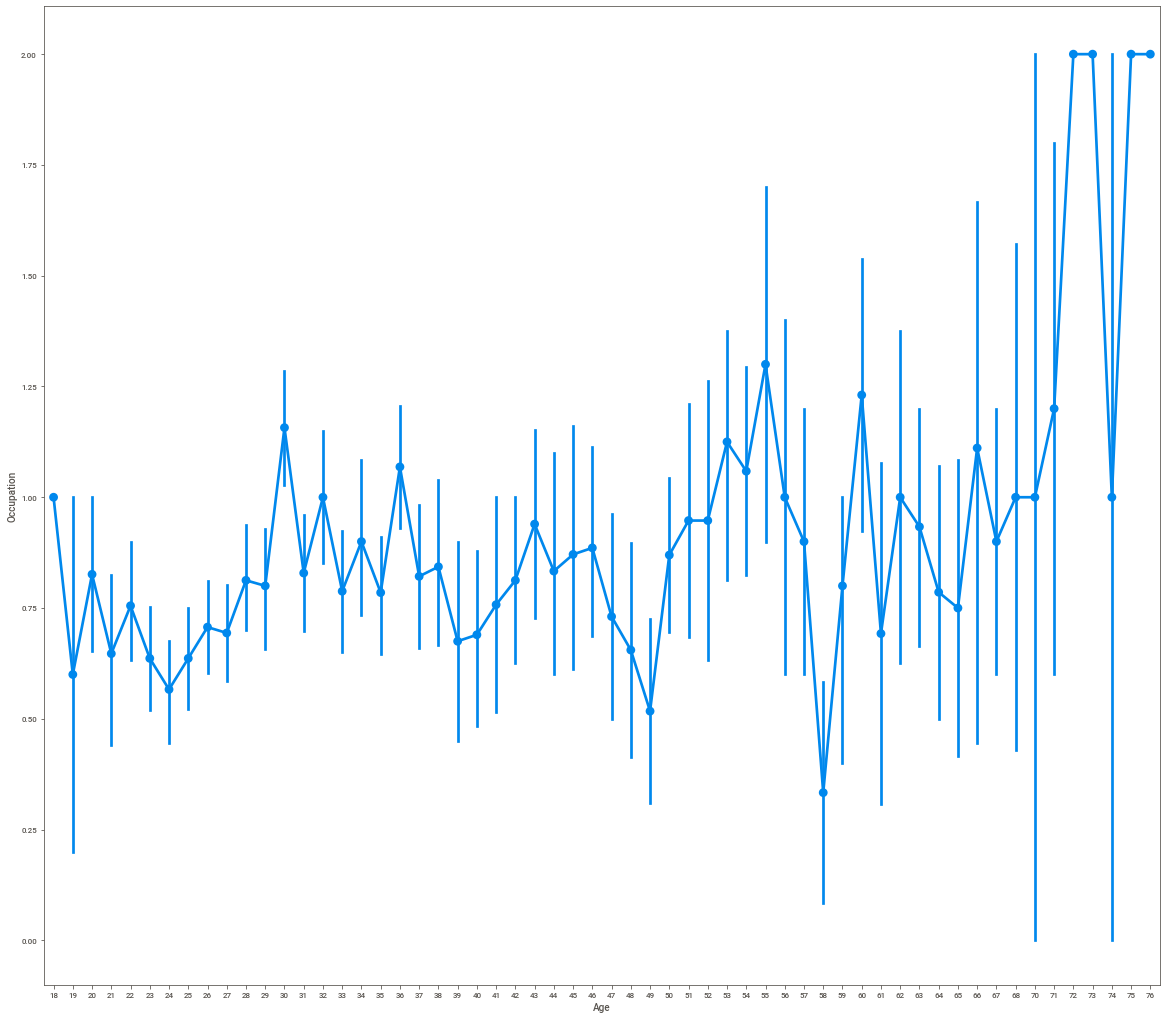

In [96]:
plt.figure(figsize=(20,18))
sns.pointplot(x=df["Age"], y=df["Occupation"], 
data=df)

<Figure size 1440x1296 with 0 Axes>

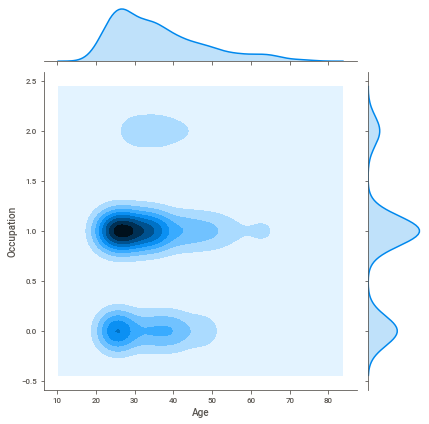

In [97]:
plt.figure(figsize=(20,18))
sns.jointplot(x=df["Age"], y=df["Occupation"], 
data=df,kind='kde')

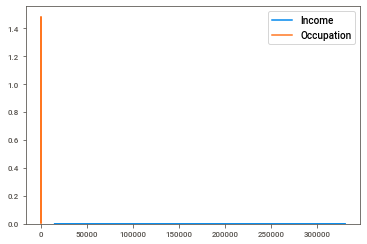

In [98]:
sns.kdeplot(df['Income'])
sns.kdeplot(df['Occupation'])

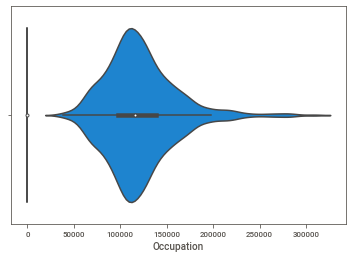

In [99]:
sns.violinplot(df['Income'])
sns.violinplot(df['Occupation'],color='red')

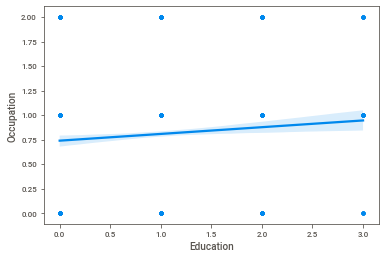

In [100]:
sns.regplot(x=df["Education"], y=df["Occupation"], 
data=df)

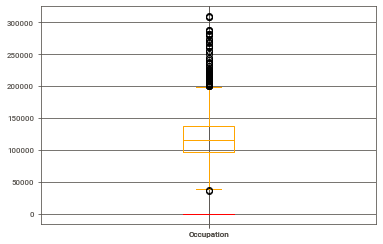

In [101]:

df.boxplot(column="Income",color='orange')
df.boxplot(column="Occupation",color='red')

In [102]:
import plotly.express as px

In [103]:
import sweetviz as sv

In [104]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [105]:
from IPython.display import IFrame

In [106]:
IFrame(src='Analyze.html',width=1000,height=600)

In [107]:
from dataprep.eda import *

  0%|                                                                                          | 0/990 [00:00<…

DataPrep Report
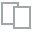
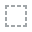
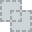
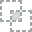
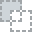
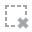
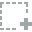
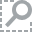
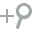
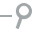
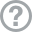
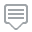
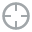
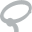
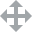
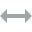
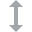
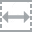
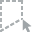
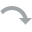
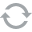
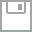
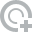
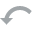
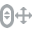
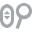
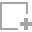
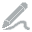
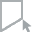
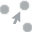
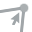
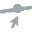

In [108]:
create_report(df)

In [109]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

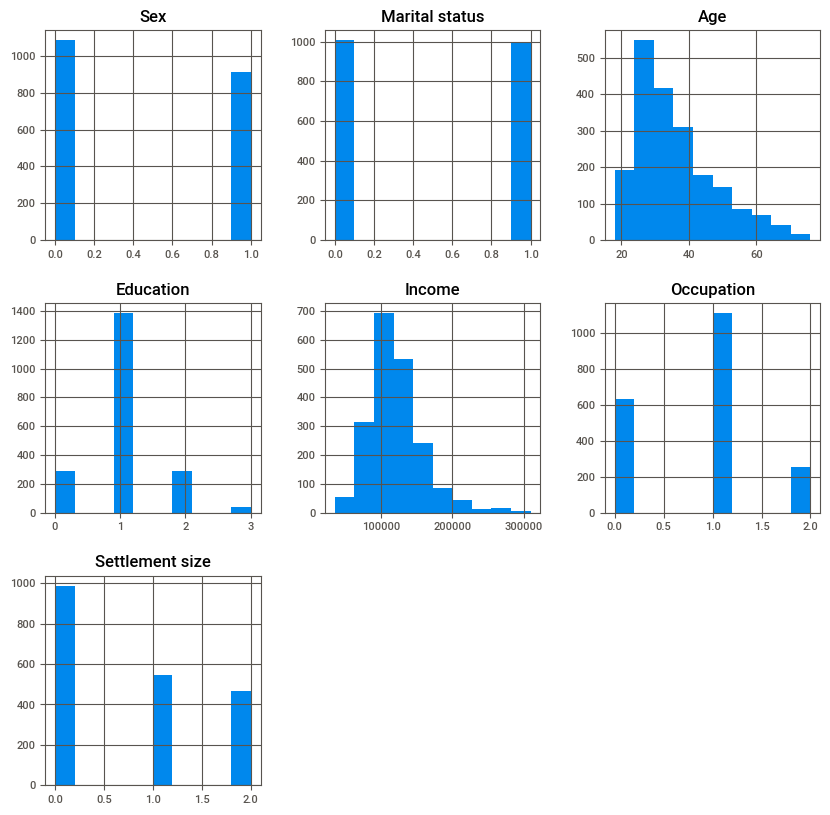

In [110]:
df.hist(figsize=(10,10))
plt.show()

In [111]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [112]:
man=MinMaxScaler()
feat=['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size']
df[feat]=man.fit_transform(df[feat])
df[feat]

Sex  Marital status       Age  Education    Income  Occupation  \
ID                                                                          
100000001  0.0             0.0  0.844828   0.666667  0.324781         0.5   
100000002  1.0             1.0  0.068966   0.333333  0.420210         0.5   
100000003  0.0             0.0  0.534483   0.333333  0.195144         0.0   
100000004  0.0             0.0  0.465517   0.333333  0.496223         0.5   
100000005  0.0             0.0  0.603448   0.333333  0.413842         0.5   
...        ...             ...       ...        ...       ...         ...   
100001996  1.0             0.0  0.500000   0.333333  0.320595         0.0   
100001997  1.0             1.0  0.155172   0.333333  0.299460         0.5   
100001998  0.0             0.0  0.224138   0.000000  0.184871         0.0   
100001999  1.0             1.0  0.103448   0.333333  0.227162         0.0   
100002000  0.0             0.0  0.120690   0.000000  0.119123         0.0   

           Settlement size  
ID                          
100000001              1.0  
100000002              1.0  
100000003              0.0  
100000004              0.5  
100000005              0.5  
...                    ...  
100001996              0.0  
100001997              0.0  
100001998              0.0  
100001999              0.0  
100002000              0.0  

[2000 rows x 7 columns]

In [113]:
std=StandardScaler()
feat=['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size']
df[feat]=std.fit_transform(df[feat])
df[feat]

Sex  Marital status       Age  Education    Income  \
ID                                                                   
100000001 -0.917399       -0.993024  2.653614   1.604323  0.097524   
100000002  1.090038        1.007025 -1.187132  -0.063372  0.782654   
100000003 -0.917399       -0.993024  1.117316  -0.063372 -0.833202   
100000004 -0.917399       -0.993024  0.775916  -0.063372  1.328386   
100000005 -0.917399       -0.993024  1.458716  -0.063372  0.736932   
...             ...             ...       ...        ...       ...   
100001996  1.090038       -0.993024  0.946616  -0.063372  0.067471   
100001997  1.090038        1.007025 -0.760382  -0.063372 -0.084265   
100001998 -0.917399       -0.993024 -0.418983  -1.731068 -0.906957   
100001999  1.090038        1.007025 -1.016432  -0.063372 -0.603329   
100002000 -0.917399       -0.993024 -0.931082  -1.731068 -1.378987   

           Occupation  Settlement size  
ID                                      
100000001    0.296823         1.552326  
100000002    0.296823         1.552326  
100000003   -1.269525        -0.909730  
100000004    0.296823         0.321298  
100000005    0.296823         0.321298  
...               ...              ...  
100001996   -1.269525        -0.909730  
100001997    0.296823        -0.909730  
100001998   -1.269525        -0.909730  
100001999   -1.269525        -0.909730  
100002000   -1.269525        -0.909730  

[2000 rows x 7 columns]

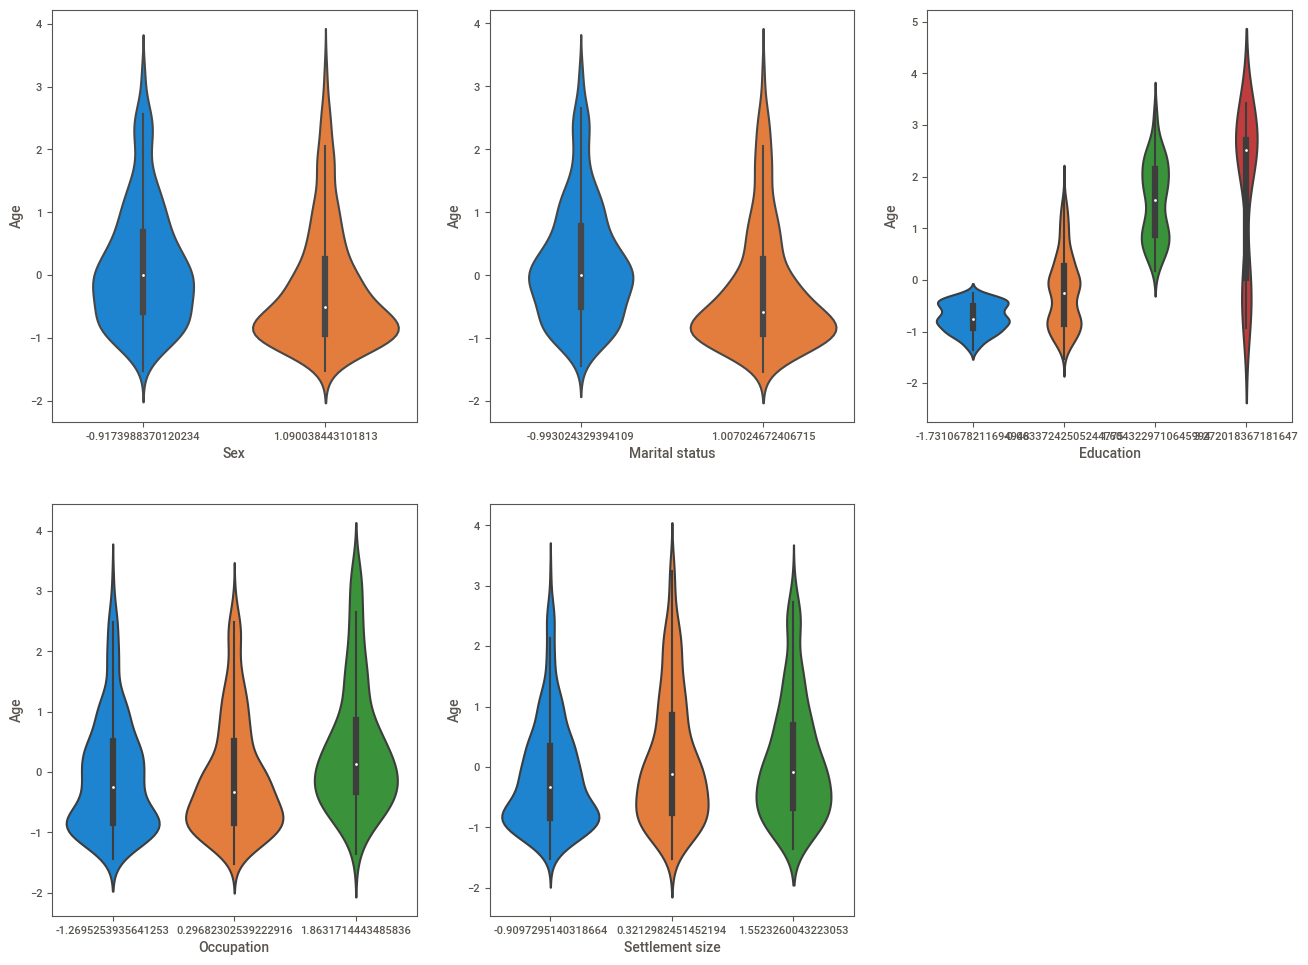

In [133]:
plt.figure(figsize=(16,12),num=1)
m=1
for i in df.drop(['Age','Income'],axis=1).columns:
    plt.subplot(2,3,m)
    sns.violinplot(x=i,y='Age',data=df)
    m+=1